In [95]:
import pandas
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [96]:
pdb_id = '1OPD'

# Input data: sanity check

In [97]:
rmsds = pandas.read_csv(pdb_id + '.rmsd.csv', index_col=0)
rmsds[:3]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
0,9,4,50,500,PAM30,28.087389
1,7,8,50,500,BLOSUM62,39.443638
2,9,6,100,500,PAM30,35.397015


In [98]:
len(rmsds)

36

# Fragment size

In [99]:
rmsds = rmsds.sort(['group_count', 'max_templates', 'max_blast', 'matrix', 'fragment_size'])
rmsds[:6]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
35,5,4,50,500,BLOSUM62,34.036125
22,7,4,50,500,BLOSUM62,40.770187
31,9,4,50,500,BLOSUM62,31.196402
9,5,4,50,500,PAM30,23.304964
32,7,4,50,500,PAM30,38.711311
0,9,4,50,500,PAM30,28.087389


In [100]:
fragment5 = rmsds[rmsds['fragment_size'] == 5]['rmsd']
fragment7 = rmsds[rmsds['fragment_size'] == 7]['rmsd']
fragment9 = rmsds[rmsds['fragment_size'] == 9]['rmsd']

fragment5[:2]

35    34.036125
9     23.304964
Name: rmsd, dtype: float64

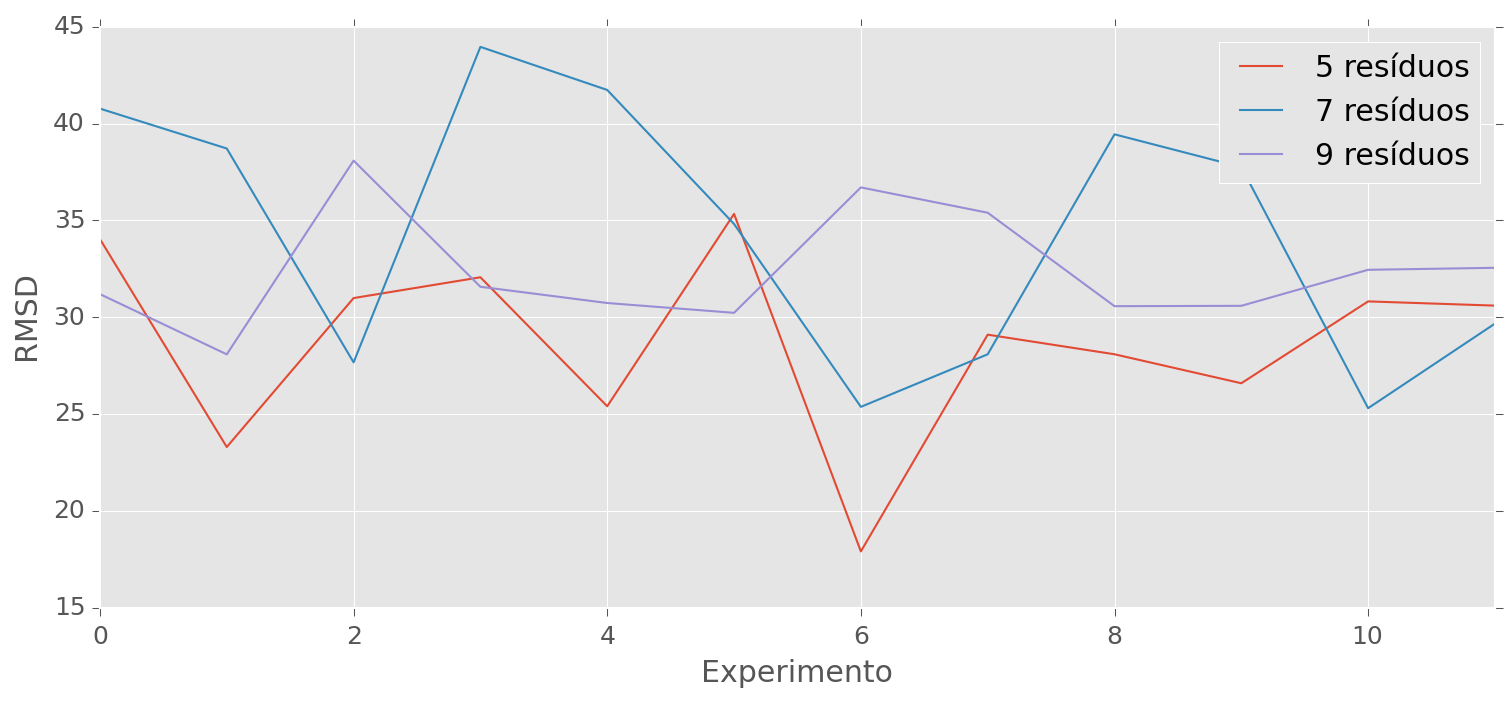

In [101]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(
    1, 1, 1, 
    xlim=(0, 11),
    xlabel="Experimento",
    ylabel="RMSD",
)

ax.plot(fragment5, label='5 resíduos')
ax.plot(fragment7, label='7 resíduos')
ax.plot(fragment9, label='9 resíduos')

ax.legend()

fig.savefig(pdb_id + '.fragmentsize.comparison.svg', format='svg')

# Number of groups

In [102]:
rmsds = rmsds.sort(['fragment_size', 'max_blast', 'matrix', 'max_templates', 'group_count'])
rmsds[:6]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
35,5,4,50,500,BLOSUM62,34.036125
27,5,6,50,500,BLOSUM62,25.408100
3,5,8,50,500,BLOSUM62,28.091312
29,5,4,100,500,BLOSUM62,30.991491
10,5,6,100,500,BLOSUM62,17.916443
16,5,8,100,500,BLOSUM62,30.820370


In [103]:
grupo4 = rmsds[rmsds['group_count'] == 4]['rmsd']
grupo6 = rmsds[rmsds['group_count'] == 6]['rmsd']
grupo8 = rmsds[rmsds['group_count'] == 8]['rmsd']

grupo4[:2]

35    34.036125
29    30.991491
Name: rmsd, dtype: float64

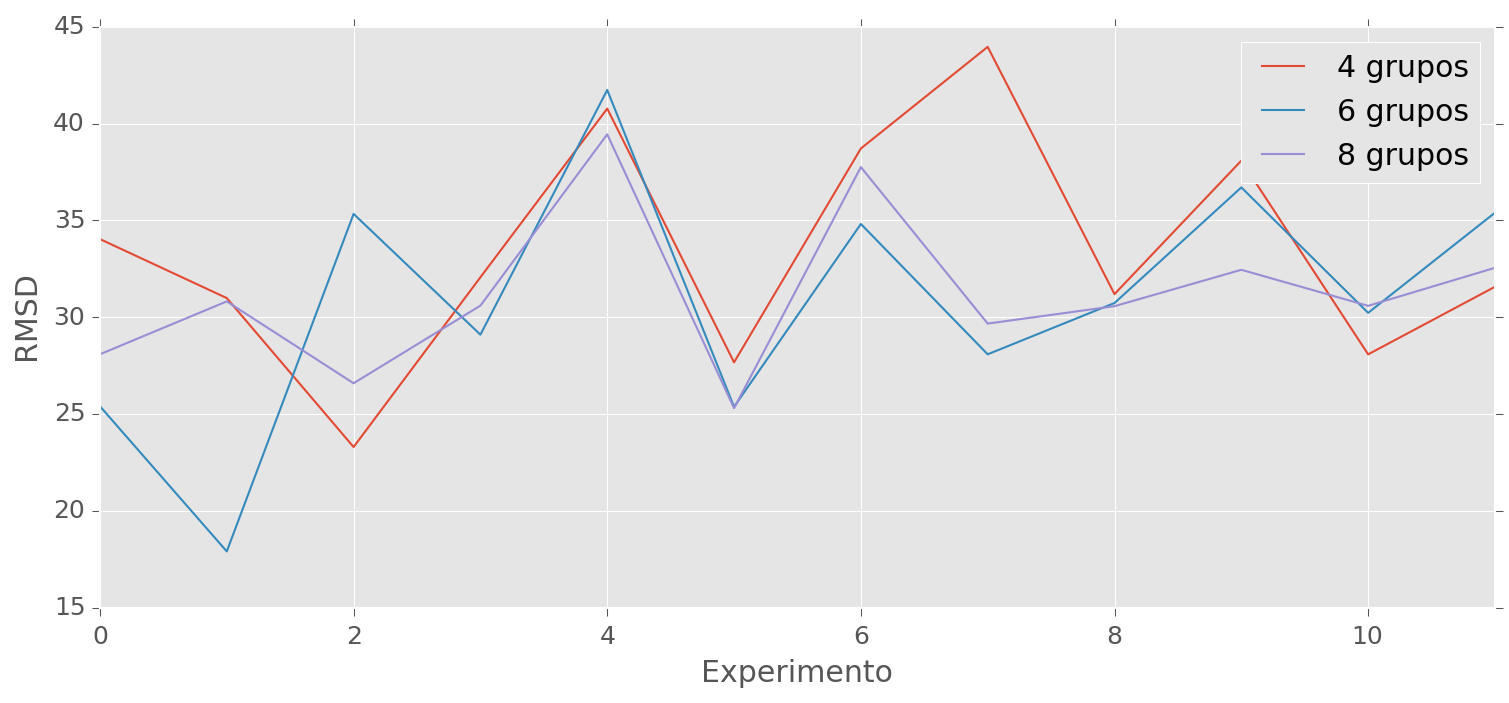

In [104]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(
    1, 1, 1, 
    xlim=(0, 11),
    xlabel="Experimento",
    ylabel="RMSD",
)

ax.plot(grupo4, label='4 grupos')
ax.plot(grupo6, label='6 grupos')
ax.plot(grupo8, label='8 grupos')


ax.legend()

fig.savefig(pdb_id + '.numberofgroups.comparison.svg', format='svg')

# Number of templates

In [105]:
rmsds = rmsds.sort(['fragment_size', 'group_count', 'max_blast', 'matrix', 'max_templates'])
rmsds[:3]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
35,5,4,50,500,BLOSUM62,34.036125
29,5,4,100,500,BLOSUM62,30.991491
9,5,4,50,500,PAM30,23.304964


In [106]:
templates50 = rmsds[rmsds['max_templates'] == 50]['rmsd']
templates100 = rmsds[rmsds['max_templates'] == 100]['rmsd']

templates50[:2]

35    34.036125
9     23.304964
Name: rmsd, dtype: float64

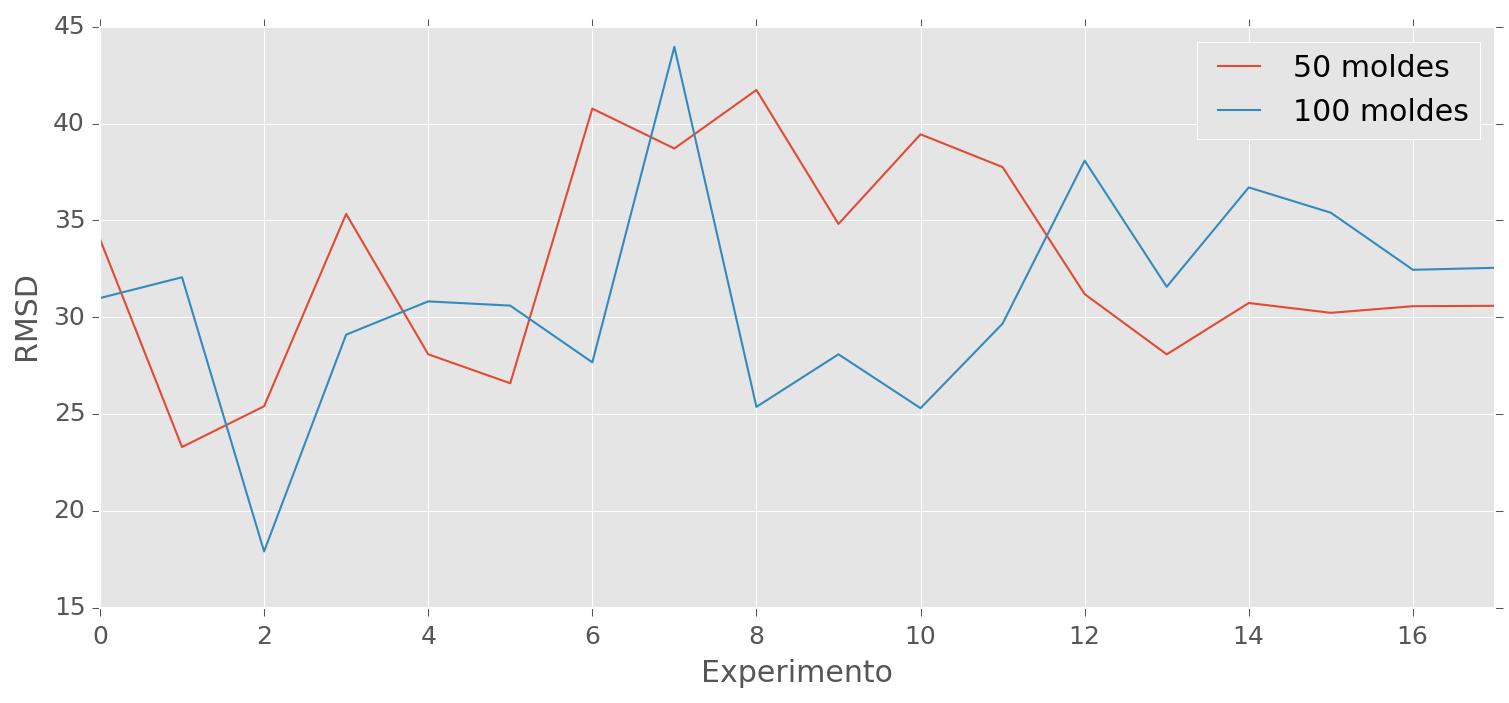

In [107]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(
    1, 1, 1, 
    xlim=(0, 17),
    xlabel="Experimento",
    ylabel="RMSD",
)

ax.plot(templates50, label='50 moldes')
ax.plot(templates100, label='100 moldes')

ax.legend()

fig.savefig(pdb_id +  '.maxtemplates.comparison.svg', format='svg')

# Substitution Matrix

In [108]:
rmsds = rmsds.sort(['fragment_size', 'group_count', 'max_templates', 'max_blast', 'matrix'])
rmsds[:4]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
35,5,4,50,500,BLOSUM62,34.036125
9,5,4,50,500,PAM30,23.304964
29,5,4,100,500,BLOSUM62,30.991491
14,5,4,100,500,PAM30,32.065632


In [109]:
blosum62 = rmsds[rmsds['matrix'] == 'BLOSUM62']['rmsd']
pam30 = rmsds[rmsds['matrix'] == 'PAM30']['rmsd']
blosum62[:2]

35    34.036125
29    30.991491
Name: rmsd, dtype: float64

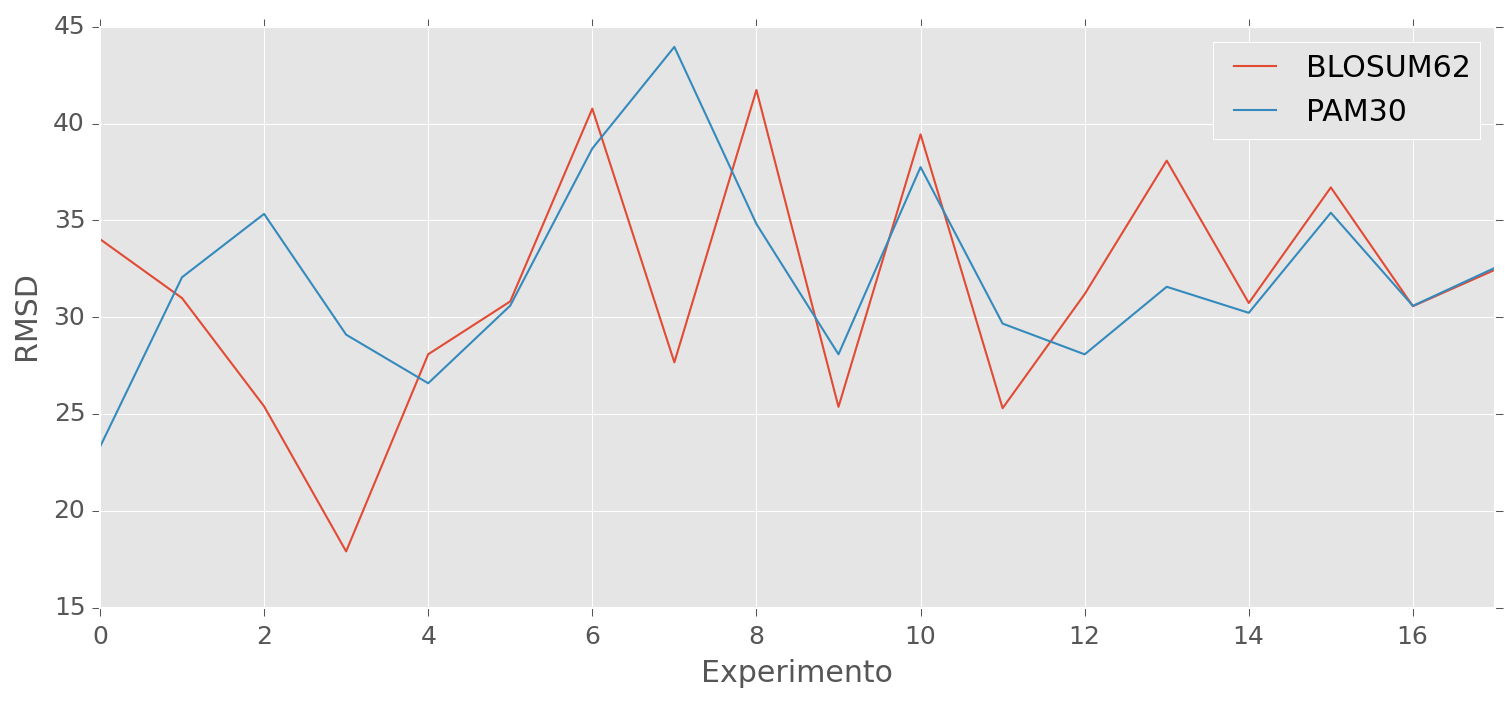

In [110]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(
    1, 1, 1, 
    xlim=(0, 17),
    xlabel="Experimento",
    ylabel="RMSD",
)

ax.plot(blosum62, label='BLOSUM62')
ax.plot(pam30, label='PAM30')
ax.legend()

fig.savefig(pdb_id + '.substitutionmatrix.comparison.svg', format='svg')